# KNN Regressor....

### Business Problem: Predicting the price of health insurance premium.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data=pd.read_csv(r'C:\Users\c2c\Desktop\31st jan datascience batch\Machine_Learning\Linear_Regression\insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing:

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Handling categorical data:
* one-hot encoding and dummies

In [8]:
data.loc[data["sex"]=="male","sex"]=0  # becoz male are paying less charges.
data.loc[data["sex"]=="female","sex"]=1 # becoz female paying more charges

In [9]:
data.loc[data['region']=="southeast","region"]=3   # 3 becoz southeast region customers paying more charges.
data.loc[data['region']=="northeast","region"]=2   # becoz lesser than southeast region.
data.loc[data['region']=="southwest","region"]=1   # by combining the data we can reduce the no. of labels also.
data.loc[data['region']=="northwest","region"]=1   #Both the southwest and northwest paying same charges.

In [10]:
data2=pd.get_dummies(data["smoker"],prefix="smoker",drop_first=True)
data=pd.concat([data,data2],axis=1).drop(["smoker"],axis=1)

In [11]:
data3=pd.get_dummies(data["sex"],prefix="sex",drop_first=True)
data=pd.concat([data,data3],axis=1).drop(["sex"],axis=1)

# Feature Selection:

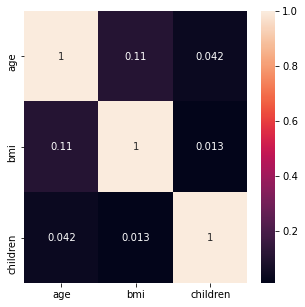

In [12]:
required_features_data=data[["age","bmi","children"]]
plt.figure(figsize=(5,5))
sns.heatmap(required_features_data.corr(),annot=True) # cmap="cool" (color) , annot=notation marking of numbes on the graph.
plt.show()

# Model Creation:

* Split x and y

In [15]:
x=data.drop(columns= ['charges'],axis=1)
y=data['charges']

* Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler_object = StandardScaler()
x_scaled = scaler_object.fit_transform(x)

* Splitting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

### Determine optimal k (n_neighbors)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_value = []

for k in range(1,20):
    knn_regressor_model = KNeighborsRegressor(n_neighbors = k)
    knn_regressor_model.fit(x_train,y_train)
    y_pred= knn_regressor_model.predict(x_test)
    
    error= np.sqrt(mean_squared_error(y_test,y_pred))
    
    rmse_value.append(error)
    print('Root mean squared error for k=',k,'is:=',error)

Root mean squared error for k= 1 is:= 6776.953933836941
Root mean squared error for k= 2 is:= 5511.325668716264
Root mean squared error for k= 3 is:= 5189.771940002199
Root mean squared error for k= 4 is:= 4910.691395878197
Root mean squared error for k= 5 is:= 4989.099103337984
Root mean squared error for k= 6 is:= 4985.624369387288
Root mean squared error for k= 7 is:= 4961.711724218073
Root mean squared error for k= 8 is:= 5013.482977140783
Root mean squared error for k= 9 is:= 5128.469672780342
Root mean squared error for k= 10 is:= 5095.371655730205
Root mean squared error for k= 11 is:= 5089.44246345754
Root mean squared error for k= 12 is:= 5025.6054387283675
Root mean squared error for k= 13 is:= 5045.88309477079
Root mean squared error for k= 14 is:= 5057.848219441484
Root mean squared error for k= 15 is:= 5109.518993895791
Root mean squared error for k= 16 is:= 5130.132843915038
Root mean squared error for k= 17 is:= 5103.9901837511115
Root mean squared error for k= 18 is:= 5

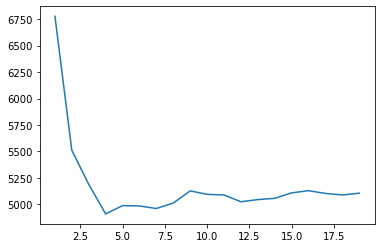

In [20]:
plt.plot(range(1,20),rmse_value)

In [23]:
Knn_regressor_actual_model = KNeighborsRegressor(n_neighbors=7)

In [25]:
Knn_regressor_actual_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [27]:
y_predict = Knn_regressor_actual_model.predict(x_test)

# Evaluation :

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score_of_model = r2_score(y_test,y_predict)

In [30]:
r2_score_of_model

0.8414248992717367

### Calculating adjusted_r2_score :

In [31]:
x_train.shape

(1070, 6)

In [34]:
# formula for adjusted_r2_score =  1-(1-r2_score)*(observations - 1)/(observations-columns-1)

In [35]:
adjusted_r2_score = 1-(1-0.84)*(1070-1)/(1070-6-1)
adjusted_r2_score

0.8390968955785513

### Calculating mean_squared_error & mean_absolute_error:

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
np.sqrt(mean_squared_error(y_test,y_predict))

4961.711724218073

In [38]:
mean_absolute_error(y_test,y_predict)

3046.6110021071427